In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from itertools import combinations
from statsmodels.stats.multitest import multipletests


In [2]:
file_path = r"C:\Users\34679\Desktop\TFM\DatosProducción\Datos_Producción.xlsx"

df = pd.read_excel(file_path, sheet_name='Sheet1')

df.head(12)


,Participante,Banda de Frecuencia,Categoría Producción,F1 Score,Accuracy
0,Participante 1,Alpha,Imagined,0.96,1.00
1,Participante 1,Alpha,Silence,0.96,0.92
2,Participante 1,Alpha,Real,1.00,1.00
3,Participante 1,Beta,Imagined,0.96,1.00
4,Participante 1,Beta,Silence,0.96,0.92
5,Participante 1,Beta,Real,0.93,0.92
6,Participante 1,Gamma,Imagined,0.00,0.00
7,Participante 1,Gamma,Silence,0.49,0.69
8,Participante 1,Gamma,Real,0.52,0.42
9,Participante 1,High Gamma,Imagined,0.24,0.18


Z-Score for Alpha: 29.63
P-Value for Alpha: 0.0000
Z-Score for Beta: 43.03
P-Value for Beta: 0.0000
Z-Score for Gamma: 8.32
P-Value for Gamma: 0.0000
Z-Score for High Gamma: 8.04
P-Value for High Gamma: 0.0000


C:\Users\34679\AppData\Local\Temp\ipykernel_25424\2880654232.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')
C:\Users\34679\AppData\Local\Temp\ipykernel_25424\2880654232.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')
C:\Users\34679\AppData\Local\Temp\ipykernel_25424\2880654232.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x='Banda de Frecuencia', y

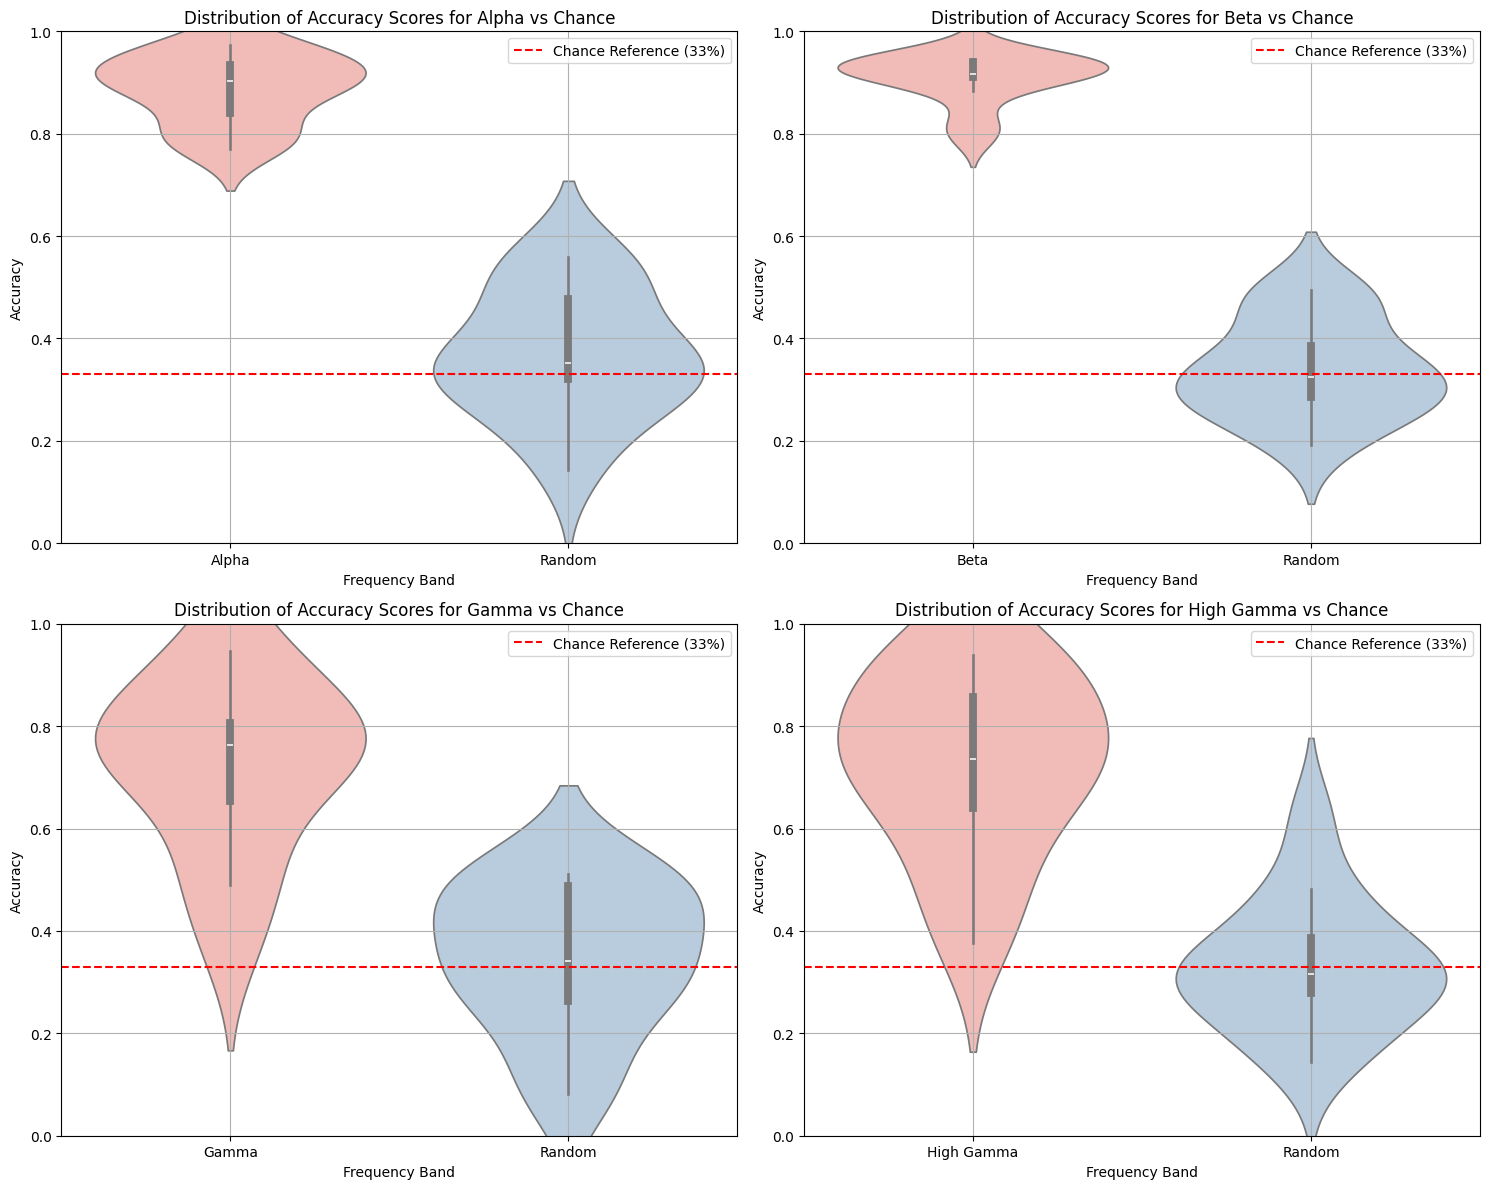

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

reference_value = 0.33

df_grouped = df.groupby(['Participante', 'Banda de Frecuencia'])['Accuracy'].mean().reset_index()

bands = [band for band in df_grouped['Banda de Frecuencia'].unique() if band != 'All Bands']

plt.figure(figsize=(15, 12))


for i, band in enumerate(bands, 1):
    filtered_df = df_grouped[df_grouped['Banda de Frecuencia'] == band]

    
    random_data = pd.DataFrame({
        'Participante': filtered_df['Participante'],  
        'Banda de Frecuencia': ['Random'] * len(filtered_df),
        'Accuracy': np.clip(np.random.normal(loc=reference_value, scale=0.1, size=len(filtered_df)), 0, 1)
    })

 
    combined_df = pd.concat([filtered_df, random_data])

    # Calcular la media, desviación estándar, Z-Score y P-Value
    mean_accuracy = filtered_df['Accuracy'].mean()
    std_accuracy = filtered_df['Accuracy'].std()
    z_score = (mean_accuracy - reference_value) / (std_accuracy / np.sqrt(len(filtered_df)))
    p_value = stats.norm.sf(np.abs(z_score)) * 2  # Valor p para el Z-Score

    print(f"Z-Score for {band}: {z_score:.2f}")
    print(f"P-Value for {band}: {p_value:.4f}")

    # Crear el subplot 
    plt.subplot(2, 2, i)
    sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')

    # Añadir una línea de referencia 
    plt.axhline(reference_value, color='red', linestyle='--', label=f'Chance Reference ({reference_value*100:.0f}%)')

    
    plt.ylim(0, 1)  

   
    plt.title(f'Distribution of Accuracy Scores for {band} vs Chance')
    plt.xlabel('Frequency Band')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)


plt.tight_layout()
plt.savefig('Model_vs_Chance_Comparison_Frequency_Bands_Accuracy.png', format='png', bbox_inches='tight')
plt.show()


C:\Users\34679\AppData\Local\Temp\ipykernel_25424\3458271774.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')


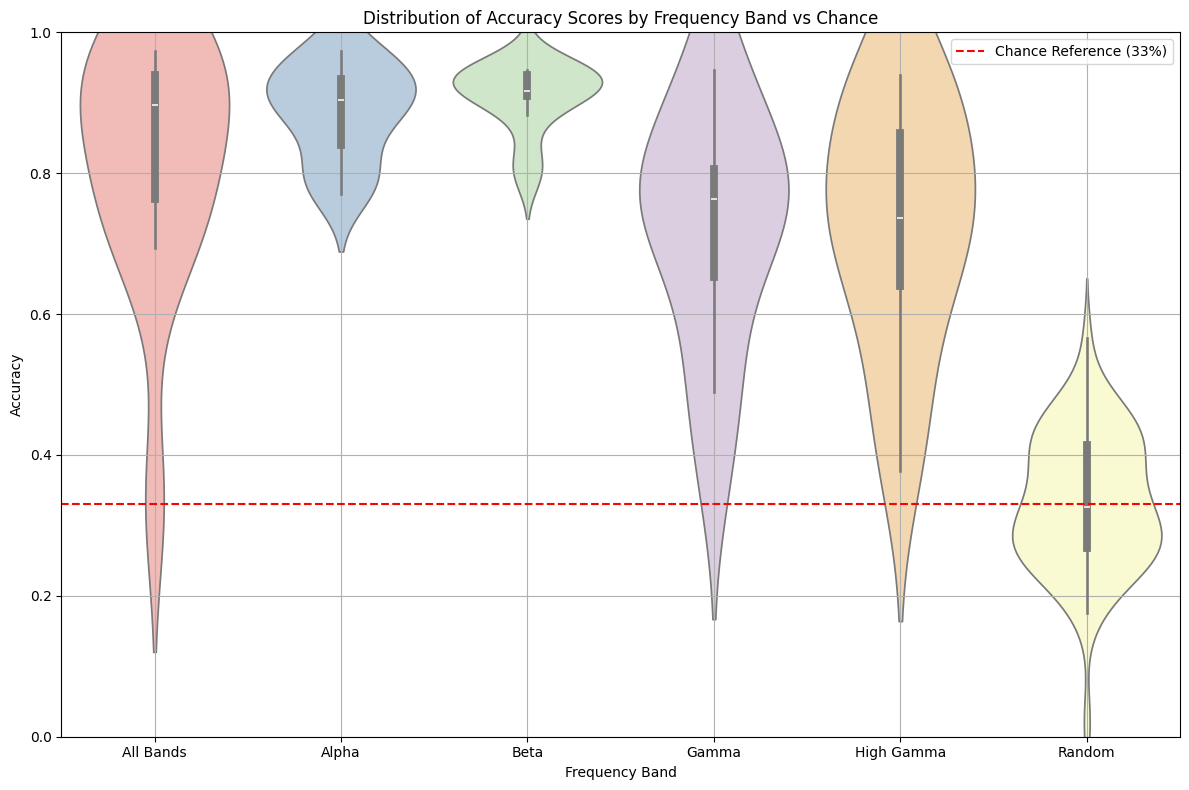

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

reference_value = 0.33

df_grouped = df.groupby(['Participante', 'Banda de Frecuencia'])['Accuracy'].mean().reset_index()

random_data = pd.DataFrame({
    'Participante': df_grouped['Participante'],
    'Banda de Frecuencia': 'Random',
    'Accuracy': np.clip(np.random.normal(loc=reference_value, scale=0.1, size=len(df_grouped)), 0, 1)
})

combined_df = pd.concat([df_grouped, random_data])

plt.figure(figsize=(12, 8))

sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')

plt.axhline(reference_value, color='red', linestyle='--', label=f'Chance Reference ({reference_value*100:.0f}%)')

plt.ylim(0, 1)

plt.title('Distribution of Accuracy Scores by Frequency Band vs Chance')
plt.xlabel('Frequency Band')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('Model_vs_Chance_Comparison_Accuracy.png', format='png', bbox_inches='tight')
plt.show()


In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats


reference_value = 0.33

df_grouped = df.groupby('Participante')['Accuracy'].agg(['mean', 'std']).reset_index()


df_grouped['Z-Score'] = (df_grouped['mean'] - reference_value) / (df_grouped['std'] / np.sqrt(len(df)))
df_grouped['P-Value'] = stats.norm.sf(np.abs(df_grouped['Z-Score'])) * 2  # Valor p para el Z-Score


results_df = pd.DataFrame({
    'Participante': df_grouped['Participante'],
    'Media de Precisión': df_grouped['mean'],
    'Desviación Estándar': df_grouped['std'],
    'Z-Score': df_grouped['Z-Score'],
    'P-Value': df_grouped['P-Value'],
    'Valor de Referencia': reference_value
})


results_df.to_excel('Participantes_Comparison_Results.xlsx', index=False)

print(results_df)


        Participante  Media de Precisión  Desviación Estándar     Z-Score  \
0   Participanate 14            0.942667             0.049637  172.360598   
1     Participante 1            0.600000             0.404740    9.315479   
2    Participante 10            0.946667             0.045774  188.126982   
3    Participante 11            0.884667             0.139174   55.653169   
4    Participante 12            0.851333             0.147835   49.244193   
5    Participante 13            0.858000             0.164499   44.821598   
6     Participante 2            0.710000             0.280077   18.946291   
7     Participante 3            0.705333             0.253937   20.639972   
8     Participante 4            0.778000             0.140367   44.568777   
9     Participante 5            0.796000             0.150371   43.275214   
10    Participante 6            0.815333             0.145596   46.548855   
11    Participante 8            0.859333             0.104913   70.456107   

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats


reference_value = 0.33

df_grouped = df[df['Banda de Frecuencia'] == 'All Bands'].groupby('Banda de Frecuencia')['Accuracy'].agg(['mean', 'std']).reset_index()


df_grouped['Z-Score'] = (df_grouped['mean'] - reference_value) / (df_grouped['std'] / np.sqrt(len(df)))
df_grouped['P-Value'] = stats.norm.sf(np.abs(df_grouped['Z-Score'])) * 2  # Valor p para el Z-Score

results = df_grouped.loc[df_grouped['Banda de Frecuencia'] == 'All Bands']


results_df = pd.DataFrame({
    'Banda de Frecuencia': ['All Bands'],
    'Media de Precisión': results['mean'].values,
    'Desviación Estándar': results['std'].values,
    'Z-Score': results['Z-Score'].values,
    'P-Value': results['P-Value'].values,
    'Valor de Referencia': [reference_value]
})


results_df.to_excel('All_Bands_Comparison_Results.xlsx', index=False)

print(results_df)


  Banda de Frecuencia  Media de Precisión  Desviación Estándar    Z-Score  \
0           All Bands            0.817692             0.252685  26.951532   

         P-Value  Valor de Referencia  
0  5.473323e-160                 0.33  


In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats

reference_value = 0.33


df_grouped = df.groupby('Banda de Frecuencia')['Accuracy'].agg(['mean', 'std']).reset_index()


df_grouped['N'] = df.groupby('Banda de Frecuencia')['Accuracy'].count().values

df_grouped['Z-Score'] = (df_grouped['mean'] - reference_value) / (df_grouped['std'] / np.sqrt(df_grouped['N']))
df_grouped['P-Value'] = stats.norm.sf(np.abs(df_grouped['Z-Score'])) * 2  


results_df = pd.DataFrame({
    'Banda de Frecuencia': df_grouped['Banda de Frecuencia'],
    'Media de Precisión': df_grouped['mean'],
    'Desviación Estándar': df_grouped['std'],
    'Número de Participantes': df_grouped['N'],
    'Z-Score': df_grouped['Z-Score'],
    'P-Value': df_grouped['P-Value'],
    'Valor de Referencia': reference_value
})


results_df.to_excel('Bandas_Comparison_Results.xlsx', index=False)

print(results_df)


  Banda de Frecuencia  Media de Precisión  Desviación Estándar  \
0           All Bands            0.817692             0.252685   
1               Alpha            0.886410             0.107397   
2                Beta            0.908205             0.094476   
3               Gamma            0.721538             0.231852   
4          High Gamma            0.725641             0.228977   

   Número de Participantes    Z-Score        P-Value  Valor de Referencia  
0                       39  12.053091   1.868100e-33                 0.33  
1                       39  32.354505  1.198994e-229                 0.33  
2                       39  38.220339   0.000000e+00                 0.33  
3                       39  10.546186   5.290124e-26                 0.33  
4                       39  10.790501   3.817013e-27                 0.33  


Z-Score for All Bands: 9.89
P-Value for All Bands: 0.0000


C:\Users\34679\AppData\Local\Temp\ipykernel_25424\822846570.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')


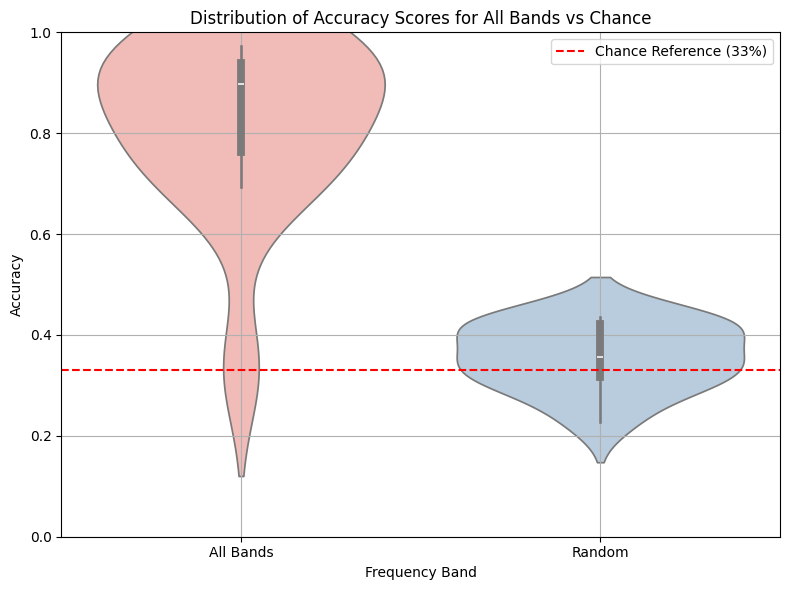

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


reference_value = 0.33

df_grouped = df.groupby(['Participante', 'Banda de Frecuencia'])['Accuracy'].mean().reset_index()

filtered_df = df_grouped[df_grouped['Banda de Frecuencia'] == 'All Bands']

random_data = pd.DataFrame({
    'Participante': filtered_df['Participante'],  # Mantener la misma cantidad de participantes
    'Banda de Frecuencia': ['Random'] * len(filtered_df),
    'Accuracy': np.clip(np.random.normal(loc=reference_value, scale=0.1, size=len(filtered_df)), 0, 1)
})

combined_df = pd.concat([filtered_df, random_data])

mean_accuracy = filtered_df['Accuracy'].mean()
std_accuracy = filtered_df['Accuracy'].std()
z_score = (mean_accuracy - reference_value) / (std_accuracy / np.sqrt(len(filtered_df)))
p_value = stats.norm.sf(np.abs(z_score)) * 2  # Valor p para el Z-Score

print(f"Z-Score for All Bands: {z_score:.2f}")
print(f"P-Value for All Bands: {p_value:.4f}")

plt.figure(figsize=(8, 6))
sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')

plt.axhline(reference_value, color='red', linestyle='--', label=f'Chance Reference ({reference_value*100:.0f}%)')

plt.ylim(0, 1) 

plt.title(f'Distribution of Accuracy Scores for All Bands vs Chance')
plt.xlabel('Frequency Band')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Mostrar la figura
plt.tight_layout()
plt.savefig('Model_vs_Chance_Comparison_All_Bands_Accuracy.png', format='png', bbox_inches='tight')
plt.show()


In [9]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests


df_grouped_A = df.groupby(['Participante', 'Banda de Frecuencia'])['Accuracy'].mean().reset_index()

print(df_grouped_A.head())

bands = ['Alpha', 'Beta', 'Gamma', 'High Gamma']

wilcoxon_results = {}

for i in range(len(bands)):
    for j in range(i + 1, len(bands)):
        band1 = bands[i]
        band2 = bands[j]
        
        
        data1 = df_grouped_A[df_grouped_A['Banda de Frecuencia'] == band1]['Accuracy']
        data2 = df_grouped_A[df_grouped_A['Banda de Frecuencia'] == band2]['Accuracy']
        
        
        min_length = min(len(data1), len(data2))
        data1 = data1.iloc[:min_length]
        data2 = data2.iloc[:min_length]
        
        
        stat, p_value = stats.wilcoxon(data1, data2)
        wilcoxon_results[f"{band1} vs {band2}"] = (stat, p_value)

results_df = pd.DataFrame(wilcoxon_results, index=['Estadístico', 'Valor p']).T

p_values = results_df['Valor p'].astype(float)

_, p_adjusted, _, _ = multipletests(p_values, method='bonferroni')

results_df['Valor p Ajustado'] = p_adjusted

print(results_df)


       Participante Banda de Frecuencia  Accuracy
0  Participanate 14           All Bands  0.973333
1  Participanate 14               Alpha  0.913333
2  Participanate 14                Beta  0.940000
3  Participanate 14               Gamma  0.946667
4  Participanate 14          High Gamma  0.940000
                     Estadístico   Valor p  Valor p Ajustado
Alpha vs Beta               27.0  0.345779          1.000000
Alpha vs Gamma               7.0  0.004639          0.027832
Alpha vs High Gamma         11.5  0.017090          0.102539
Beta vs Gamma                7.0  0.004639          0.027832
Beta vs High Gamma           4.0  0.009925          0.059553
Gamma vs High Gamma         36.0  0.813875          1.000000


c:\Users\34679\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\34679\AppData\Local\Temp\ipykernel_25424\125639363.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Banda de Frecuencia', y='Accuracy', data=df_grouped_A_filtered, palette='Set2', fliersize=0, linewidth=1.2)


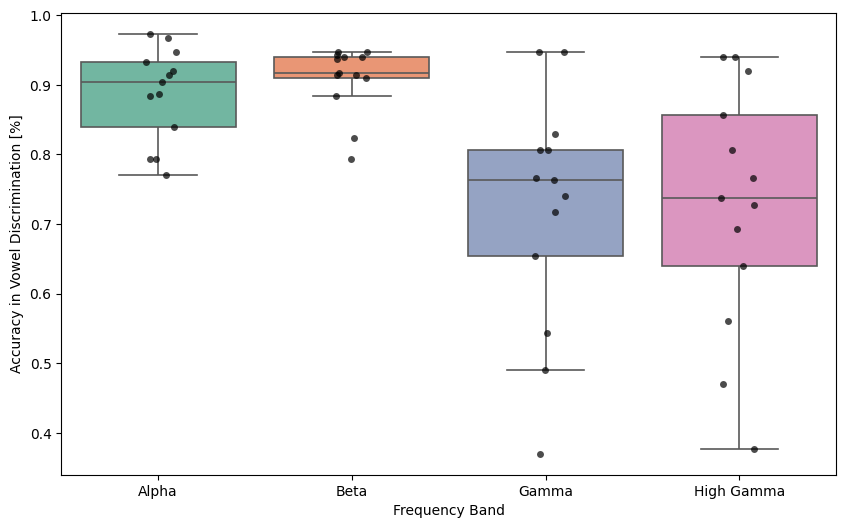

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

bands_to_include = ['Alpha', 'Beta', 'Gamma', 'High Gamma']
df_grouped_A_filtered = df_grouped_A[df_grouped_A['Banda de Frecuencia'].isin(bands_to_include)]

plt.figure(figsize=(10, 6))

sns.boxplot(x='Banda de Frecuencia', y='Accuracy', data=df_grouped_A_filtered, palette='Set2', fliersize=0, linewidth=1.2)

sns.stripplot(x='Banda de Frecuencia', y='Accuracy', data=df_grouped_A_filtered, jitter=True, color='black', size=5, dodge=False, alpha=0.7)

plt.title(None)
plt.xlabel('Frequency Band')
plt.ylabel('Accuracy in Vowel Discrimination [%]')

plt.savefig('boxplot_f1_score.png', format='png', bbox_inches='tight')

plt.show()


In [12]:
bands = df['Banda de Frecuencia'].unique()


results = {}
for i, band1 in enumerate(bands):
    for band2 in bands[i+1:]:
        scores_band1 = df[(df['Banda de Frecuencia'] == band1)]['F1 Score']
        scores_band2 = df[(df['Banda de Frecuencia'] == band2)]['F1 Score']
        
        if len(scores_band1) > 0 and len(scores_band2) > 0:
            stat, p_value = wilcoxon(scores_band1, scores_band2)
            results[(band1, band2)] = {'Wilcoxon Statistic': stat, 'p-value': p_value}

# Mostrar los resultados
for band_pair, result in results.items():
    print(f"Comparación de Bandas: {band_pair[0]} vs {band_pair[1]}")
    print(f"Wilcoxon Statistic: {result['Wilcoxon Statistic']}")
    print(f"p-value: {result['p-value']}\n")

Comparación de Bandas: Alpha vs Beta
Wilcoxon Statistic: 134.0
p-value: 0.042624009240723244

Comparación de Bandas: Alpha vs Gamma
Wilcoxon Statistic: 61.5
p-value: 4.53077518614009e-07

Comparación de Bandas: Alpha vs High Gamma
Wilcoxon Statistic: 78.0
p-value: 6.152698946329184e-05

Comparación de Bandas: Alpha vs All Bands
Wilcoxon Statistic: 272.5
p-value: 0.23326002874963137

Comparación de Bandas: Beta vs Gamma
Wilcoxon Statistic: 49.0
p-value: 3.1056218893685746e-06

Comparación de Bandas: Beta vs High Gamma
Wilcoxon Statistic: 70.0
p-value: 2.165635196230865e-05

Comparación de Bandas: Beta vs All Bands
Wilcoxon Statistic: 192.5
p-value: 0.044762174418119395

Comparación de Bandas: Gamma vs High Gamma
Wilcoxon Statistic: 280.5
p-value: 0.771167535826052

Comparación de Bandas: Gamma vs All Bands
Wilcoxon Statistic: 143.5
p-value: 0.0009921178132532027

Comparación de Bandas: High Gamma vs All Bands
Wilcoxon Statistic: 133.0
p-value: 0.002869768799694863



C:\Users\34679\AppData\Local\Temp\ipykernel_25424\3948156127.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Banda de Frecuencia', y='F1 Score', data=df_filtered, palette='Set2', fliersize=0, linewidth=1.2)


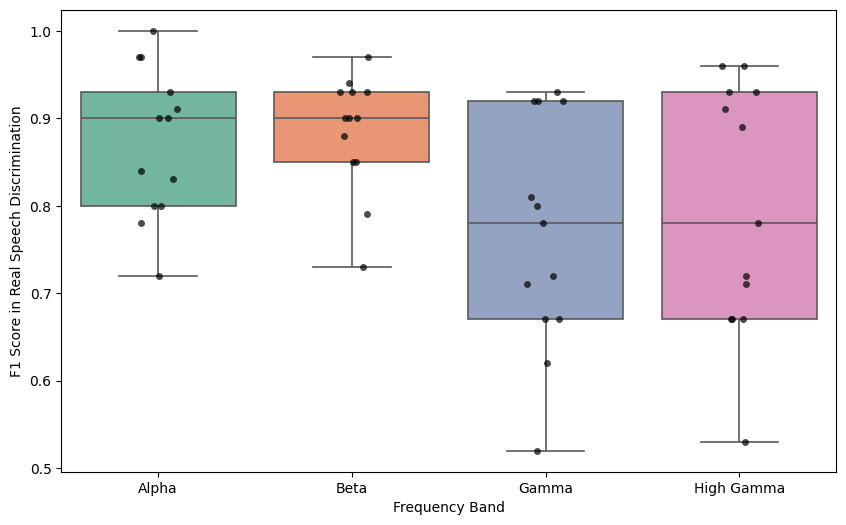

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

bands_to_include = ['Alpha', 'Beta', 'Gamma', 'High Gamma']
df_filtered = df[df['Banda de Frecuencia'].isin(bands_to_include) & (df['Categoría Producción'] == 'Real')]

plt.figure(figsize=(10, 6))

sns.boxplot(x='Banda de Frecuencia', y='F1 Score', data=df_filtered, palette='Set2', fliersize=0, linewidth=1.2)


sns.stripplot(x='Banda de Frecuencia', y='F1 Score', data=df_filtered, jitter=True, color='black', size=5, dodge=False, alpha=0.7)

plt.title(None)
plt.xlabel('Frequency Band')
plt.ylabel('F1 Score in Real Speech Discrimination')

plt.savefig('boxplot_f1_score_real_speech.png', format='png', bbox_inches='tight')

plt.show()


In [16]:
import pandas as pd
from scipy.stats import wilcoxon


df_imagined = df[df['Categoría Producción'] == 'Imagined']

bands = ['Alpha', 'Beta', 'Gamma', 'High Gamma']
results = []

for i, band1 in enumerate(bands):
    for band2 in bands[i+1:]:
        
        data_band1 = df_imagined[df_imagined['Banda de Frecuencia'] == band1]['F1 Score']
        data_band2 = df_imagined[df_imagined['Banda de Frecuencia'] == band2]['F1 Score']
        
        
        min_len = min(len(data_band1), len(data_band2))
        if min_len == 0:
            continue
        
        
        if len(data_band1) != len(data_band2):
            min_len = min(len(data_band1), len(data_band2))
            data_band1 = data_band1.sample(min_len, random_state=1)
            data_band2 = data_band2.sample(min_len, random_state=1)
        
        wilcoxon_stat, p_value = wilcoxon(data_band1, data_band2)
        
        
        results.append({
            'Comparación de Bandas': f'{band1} vs {band2}',
            'Wilcoxon Statistic': wilcoxon_stat,
            'p-value': p_value
        })

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

print(results_df)


  Comparación de Bandas  Wilcoxon Statistic   p-value
0         Alpha vs Beta                13.0  0.074647
1        Alpha vs Gamma                 1.0  0.000488
2   Alpha vs High Gamma                 5.0  0.012748
3         Beta vs Gamma                 1.0  0.000488
4    Beta vs High Gamma                 3.0  0.004742
5   Gamma vs High Gamma                33.0  1.000000


c:\Users\34679\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\34679\AppData\Local\Temp\ipykernel_25424\742111727.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Banda de Frecuencia', y='F1 Score', data=df_filtered, palette='Set2', fliersize=0, linewidth=1.2)


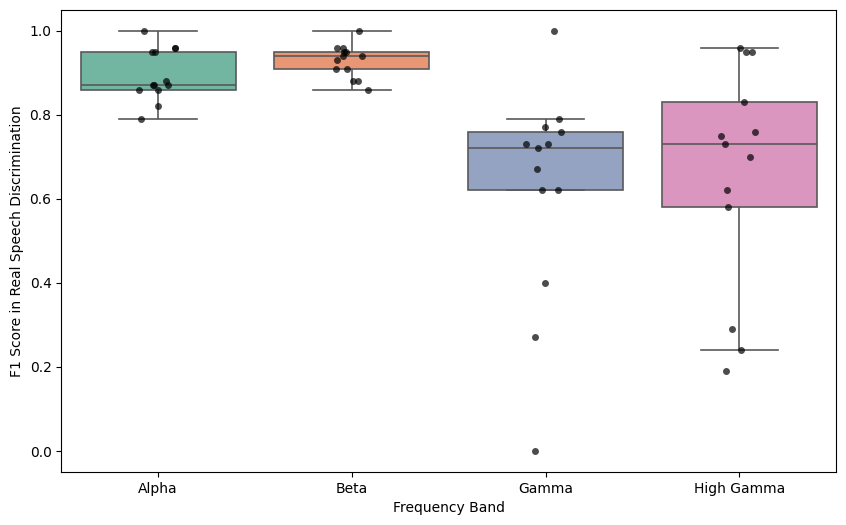

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


bands_to_include = ['Alpha', 'Beta', 'Gamma', 'High Gamma']
df_filtered = df[df['Banda de Frecuencia'].isin(bands_to_include) & (df['Categoría Producción'] == 'Imagined')]

plt.figure(figsize=(10, 6))


sns.boxplot(x='Banda de Frecuencia', y='F1 Score', data=df_filtered, palette='Set2', fliersize=0, linewidth=1.2)


sns.stripplot(x='Banda de Frecuencia', y='F1 Score', data=df_filtered, jitter=True, color='black', size=5, dodge=False, alpha=0.7)


plt.title(None)
plt.xlabel('Frequency Band')
plt.ylabel('F1 Score in Real Speech Discrimination')


plt.savefig('boxplot_f1_score_real_speech.png', format='png', bbox_inches='tight')
plt.show()